In [10]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define paths to directories
train_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/train'
validation_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/validation'

# Create Dataset from directories
def create_dataset(directory, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='categorical',  # Labels are one-hot encoded
        shuffle=True
    )
    return dataset


import matplotlib.pyplot as plt

# # Plot training and validation accuracy and loss
# def plot_training_history(history, epochs):
#     acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     epochs_range = range(epochs)

#     plt.figure(figsize=(16, 4))

#     # Plot accuracy
#     plt.subplot(1, 2, 1)
#     plt.plot(epochs_range, acc, label='Training Accuracy')
#     plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#     plt.legend(loc='lower right')
#     plt.title('Training and Validation Accuracy')

#     # Plot loss
#     plt.subplot(1, 2, 2)
#     plt.plot(epochs_range, loss, label='Training Loss')
#     plt.plot(epochs_range, val_loss, label='Validation Loss')
#     plt.legend(loc='upper right')
#     plt.title('Training and Validation Loss')

#     plt.show()

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))  # Adjusted to the length of training

    plt.figure(figsize=(16, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

In [ ]:

# Load data from directories
batch_size = 32
train_dataset = create_dataset(train_dir, batch_size)
validation_dataset = create_dataset(validation_dir, batch_size)

# Build ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_dataset.class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

# Save the model
model.save('resnet50_model.h5')

# Print a summary of the model
model.summary()


In [ ]:
"""
Training Accuracy: The training accuracy starts at 58.17% and rapidly increases, reaching 99.96% by the final epoch. 
This indicates that your model is learning the training data very well, perhaps too well, which leads to a potential concern of overfitting.

Validation Accuracy: The validation accuracy starts relatively high at 80.98% and fluctuates throughout the epochs, eventually settling at 84.05%. 
This suggests that while your model generalizes well to some extent, it is not improving significantly after a certain point, indicating a 
possible plateau.

Validation Loss: The validation loss shows a slight decrease at first but then starts to increase from epoch 5 onwards, 
which is another sign of overfitting. As the training loss continues to decrease, the validation loss increases, 
implying that the model is becoming too specialized in the training data and failing to generalize to unseen data.

"""

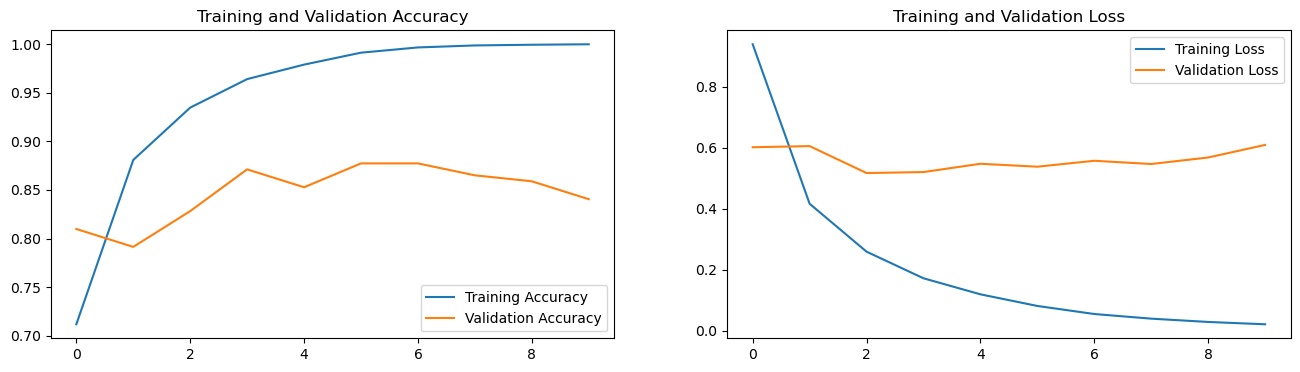

In [2]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
def plot_training_history(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(16, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Define number of epochs
epochs = 10  # Adjust if you use a different number of epochs

# Visualize training history
plot_training_history(history, epochs)


In [ ]:
""""

Accuracy and Loss Overview:
Training Accuracy:

Starts at 58.17% in the first epoch and steadily increases, reaching an impressive 99.96% by the 10th epoch.
This suggests that the model is learning the training data very well.
Validation Accuracy:

Starts at 80.98% and fluctuates slightly, with a peak around 87.73% in epochs 4, 6, and 7, before slightly declining to 84.05% by the 10th epoch.
This indicates that while the model is performing well on the validation data, it doesn't improve much after the initial few epochs.
Training Loss:

Decreases from 1.3560 to 0.0237, showing that the model is effectively minimizing the error on the training set.
Validation Loss:

Starts at 0.6014, fluctuates across epochs, and ends at 0.6090.
The loss doesn’t decrease significantly after a few epochs, which could be a sign that the model is not improving its performance on the validation set despite its continued improvement on the training set.
Analysis:
Possible Overfitting: The large gap between training accuracy (99.96%) and validation accuracy (84.05%) suggests that the model may be overfitting to the training data. The model is performing almost perfectly on the training data but not generalizing as well to the validation data.

Validation Loss Plateauing: The validation loss doesn't decrease consistently, which may indicate that the model has reached its capacity to generalize from the training data to the validation data.

Early Stopping: Given that validation accuracy peaked around epochs 4-7 and then slightly declined, it might have been beneficial to implement early stopping to prevent overfitting and save training time.

"""

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define paths to directories
train_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/train'
validation_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/validation'

# Create Dataset from directories
def create_dataset(directory, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='categorical',  # Labels are one-hot encoded
        shuffle=True
    )
    return dataset

# Load data from directories
batch_size = 32
train_dataset = create_dataset(train_dir, batch_size)
validation_dataset = create_dataset(validation_dir, batch_size)

# Build ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # Another dropout layer
predictions = Dense(len(train_dataset.class_names), activation='softmax', kernel_regularizer=l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

# Save the model
model.save('resnet50_model.h5')

# Print a summary of the model
model.summary()



Found 12616 files belonging to 13 classes.
Found 163 files belonging to 13 classes.
Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 551s 1s/step - accuracy: 0.2635 - loss: 3.9773 - val_accuracy: 0.6994 - val_loss: 2.2808
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.5804 - loss: 2.6212 - val_accuracy: 0.7669 - val_loss: 2.0059
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 703s 2s/step - accuracy: 0.6476 - loss: 2.3543 - val_accuracy: 0.7975 - val_loss: 1.8698
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - accuracy: 0.6907 - loss: 2.1741 - val_accuracy: 0.7914 - val_loss: 1.7897
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 827s 2s/step - accuracy: 0.7172 - loss: 2.0188 - val_accuracy: 0.7975 - val_loss: 1.6977
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.7353 - loss: 1.8912 - val_accuracy: 0.8037 - val_loss: 1.6233
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 781s 2s/step - accuracy: 0.7504 - loss: 1.7950 - val_accuracy: 0.8221 - val_loss: 1.5653
Epoch 8/10
39

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 29,922,217 (114.14 MB)

 Trainable params: 2,111,501 (8.05 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,223,004 (16.11 MB)

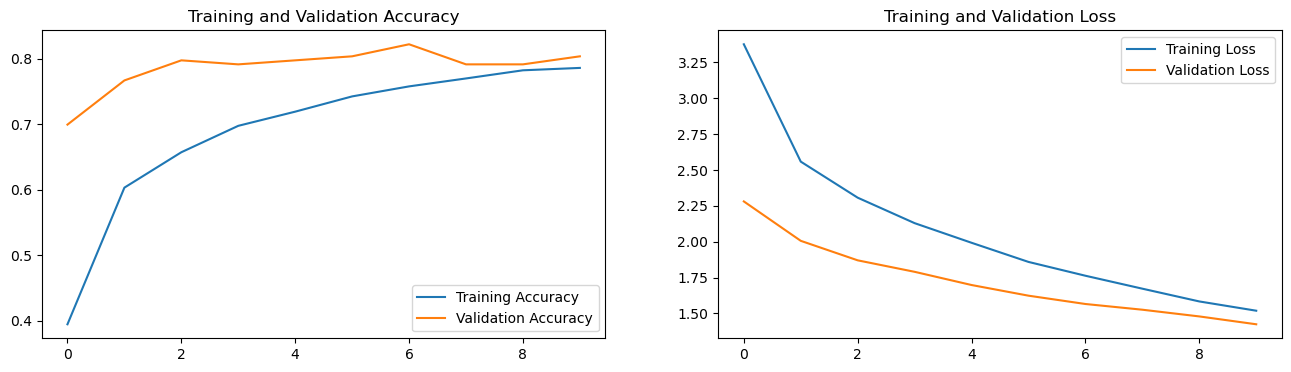

In [5]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
def plot_training_history(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(16, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Define number of epochs
epochs = 10  # Adjust if you use a different number of epochs

# Visualize training history
plot_training_history(history, epochs)

In [ ]:
"""
Progression of Accuracy:

The training accuracy steadily improves, reaching 77.43% by the final epoch.
The validation accuracy starts at 69.94% and improves to 80.37% by the end of training. 
This shows that while the model is learning, it is doing so more cautiously, likely avoiding the 
overfitting that was evident in the previous model.

Validation Loss:
The validation loss decreases consistently from 2.2808 in the first epoch to 1.4238 by the tenth epoch. This decreasing trend is a 
positive sign, indicating that the model is learning to generalize better to the validation set.

Regularization Effects:
The use of dropout and L2 regularization has helped in stabilizing the training process. While the model accuracy is 
lower compared to the previous model, the consistent improvement in validation accuracy and the decreasing validation loss 
suggest better generalization and reduced overfitting.
"""

Found 12616 files belonging to 13 classes.
Found 163 files belonging to 13 classes.
Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 2706s 7s/step - accuracy: 0.1624 - loss: 4.2879 - val_accuracy: 0.6994 - val_loss: 2.4892
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 2912s 7s/step - accuracy: 0.5306 - loss: 2.8733 - val_accuracy: 0.7791 - val_loss: 2.0747
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 2793s 7s/step - accuracy: 0.6918 - loss: 2.3568 - val_accuracy: 0.8282 - val_loss: 1.9658
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 2855s 7s/step - accuracy: 0.7884 - loss: 2.0393 - val_accuracy: 0.8405 - val_loss: 1.9098
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 6803s 17s/step - accuracy: 0.8499 - loss: 1.8504 - val_accuracy: 0.8528 - val_loss: 1.8818
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 2727s 7s/step - accuracy: 0.8916 - loss: 1.7081 - val_accuracy: 0.8528 - val_loss: 1.8668
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 42119s 107s/step - accuracy: 0.9259 - loss: 1.6020 - val_accuracy: 0.8589 - val_loss: 1.8523
Ep

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 76,991,401 (293.70 MB)

 Trainable params: 25,646,093 (97.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 51,292,188 (195.66 MB)

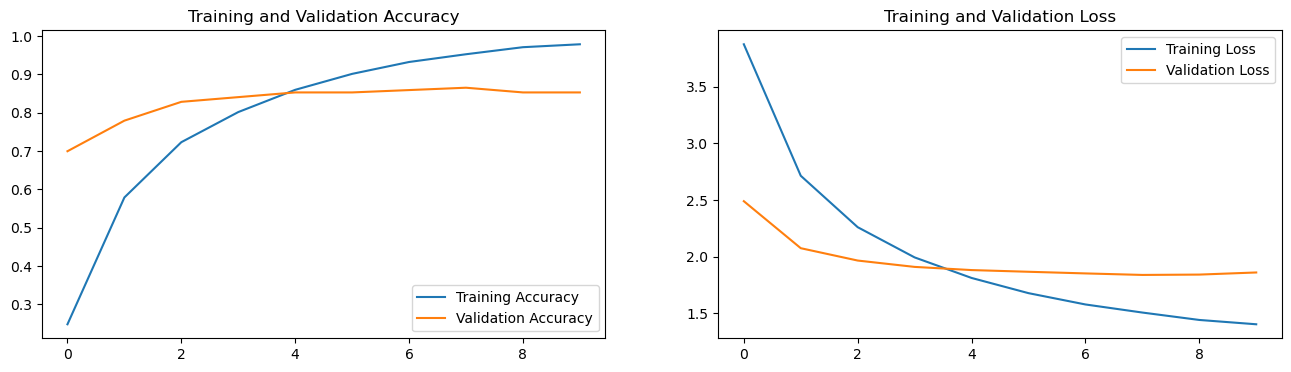

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define paths to directories
train_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/train'
validation_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/validation'

# Create Dataset from directories
def create_dataset(directory, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='categorical',  # Labels are one-hot encoded
        shuffle=True
    )
    return dataset

# Load data from directories
batch_size = 32
train_dataset = create_dataset(train_dir, batch_size)
validation_dataset = create_dataset(validation_dir, batch_size)

# Build ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # Another dropout layer
predictions = Dense(len(train_dataset.class_names), activation='softmax', kernel_regularizer=l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

# Save the model
model.save('resnet50_model.h5')

# Print a summary of the model
model.summary()

epochs = 10 
plot_training_history(history, epochs)

In [ ]:
""""
Analysis: 
Overfitting: The training accuracy is very high, but the validation accuracy doesn't improve much after the early epochs, 
and the validation loss is not decreasing significantly. 
This indicates that the model is likely overfitting to the training data.
"""

Found 12616 files belonging to 13 classes.
Found 163 files belonging to 13 classes.
Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2887s 7s/step - accuracy: 0.1436 - loss: 4.3800 - val_accuracy: 0.6933 - val_loss: 2.4863 - learning_rate: 1.0000e-05
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 6765s 17s/step - accuracy: 0.4996 - loss: 2.9806 - val_accuracy: 0.7914 - val_loss: 2.0676 - learning_rate: 1.0000e-05
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2580s 7s/step - accuracy: 0.7023 - loss: 2.3264 - val_accuracy: 0.8282 - val_loss: 1.9720 - learning_rate: 1.0000e-05
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 4169s 11s/step - accuracy: 0.7895 - loss: 2.0308 - val_accuracy: 0.8098 - val_loss: 1.9312 - learning_rate: 1.0000e-05
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2661s 7s/step - accuracy: 0.8453 - loss: 1.8528 - val_accuracy: 0.8528 - val_loss: 1.8701 - learning_rate: 1.0000e-05
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2682s 7s/step - accuracy: 0.8876 - loss: 1.7135 - val_accuracy: 0.8405 - val_loss: 1

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 76,991,401 (293.70 MB)

 Trainable params: 25,646,093 (97.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 51,292,188 (195.66 MB)

ValueError: x and y must have same first dimension, but have shapes (10,) and (8,)

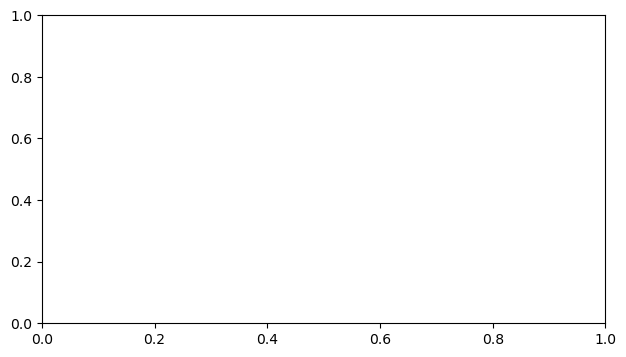

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define paths to directories
train_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/train'
validation_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/validation'

# Create Dataset from directories
def create_dataset(directory, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='categorical',  # Labels are one-hot encoded
        shuffle=True
    )
    return dataset

# Load data from directories
batch_size = 32
train_dataset = create_dataset(train_dir, batch_size)
validation_dataset = create_dataset(validation_dir, batch_size)

# Build ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # Another dropout layer
predictions = Dense(len(train_dataset.class_names), activation='softmax', kernel_regularizer=l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs to wait after no improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored quantity
)

# Define learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss
    factor=0.2,           # Reduce learning rate by a factor of 0.2
    patience=2,           # Wait for 2 epochs before reducing learning rate
    min_lr=1e-6           # Set a lower bound on the learning rate
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=50, # increased
    validation_data=validation_dataset,
    callbacks=[reduce_lr, early_stopping] 
)

# Save the model
model.save('resnet50_model_callbacks.h5')

# Print a summary of the model
model.summary()


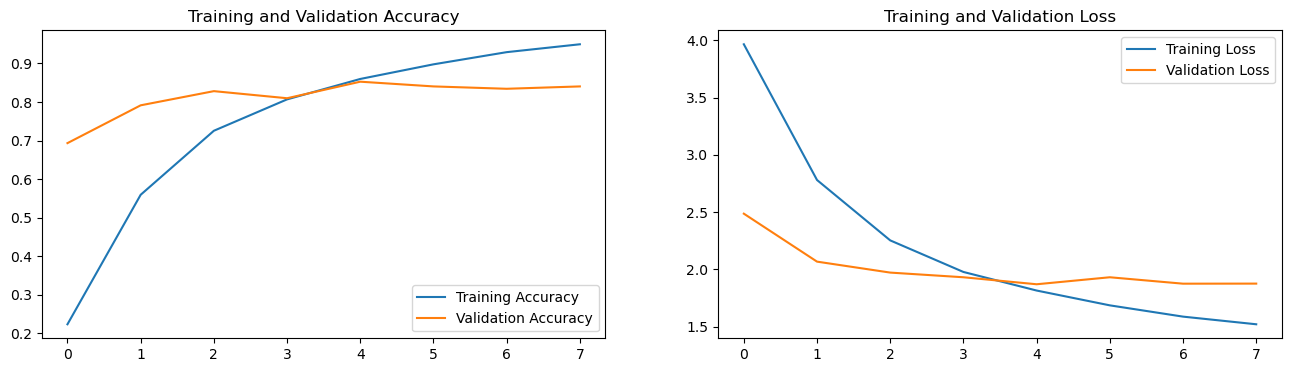

In [7]:

# Plot training and validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))  # Adjusted to the length of training

    plt.figure(figsize=(16, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)

In [ ]:
""" 
Training and Validation Accuracy:

The model's training accuracy improves significantly with each epoch, reaching over 94%.
However, validation accuracy improves much more slowly and starts to plateau, indicating possible overfitting.
Training and Validation Loss:

The training loss decreases as expected, but the validation loss does not decrease proportionally and even starts to increase after some epochs, 
further suggesting overfitting.
Learning Rate:

The learning rate started at 1e-5 and was reduced to 2e-6 after the 7th epoch, showing that the model reached a plateau early in training.
"""

Found 12616 files belonging to 13 classes.
Found 163 files belonging to 13 classes.
Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2877s 7s/step - accuracy: 0.0929 - loss: 5.6687 - val_accuracy: 0.3436 - val_loss: 3.7596 - learning_rate: 1.0000e-05
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 4730s 12s/step - accuracy: 0.1223 - loss: 4.0666 - val_accuracy: 0.5583 - val_loss: 3.6417 - learning_rate: 1.0000e-05
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3175s 8s/step - accuracy: 0.1890 - loss: 3.8594 - val_accuracy: 0.6564 - val_loss: 3.0237 - learning_rate: 1.0000e-05
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3050s 8s/step - accuracy: 0.3367 - loss: 3.4077 - val_accuracy: 0.7239 - val_loss: 2.3668 - learning_rate: 1.0000e-05
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2912s 7s/step - accuracy: 0.5114 - loss: 2.8975 - val_accuracy: 0.7546 - val_loss: 2.1602 - learning_rate: 1.0000e-05
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2745s 7s/step - accuracy: 0.6287 - loss: 2.5213 - val_accuracy: 0.7730 - val_loss: 2.

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 76,991,401 (293.70 MB)

 Trainable params: 25,646,093 (97.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 51,292,188 (195.66 MB)

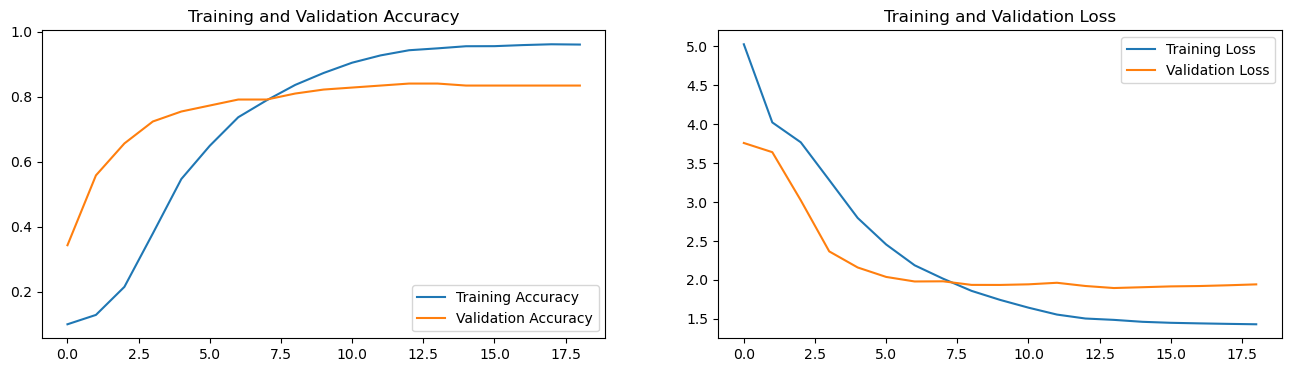

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define paths to directories
train_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/train'
validation_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/validation'

# Create Dataset from directories
def create_dataset(directory, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='categorical',  # Labels are one-hot encoded
        shuffle=True
    )
    return dataset

# Load data from directories
batch_size = 32
train_dataset = create_dataset(train_dir, batch_size)
validation_dataset = create_dataset(validation_dir, batch_size)

# Build ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)  # Increase dropout rate (prevent the model from becoming too dependent on specific neurons)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.7)(x)  # Another dropout layer
predictions = Dense(len(train_dataset.class_names), activation='softmax', kernel_regularizer=l2(0.001))(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers
for layer in base_model.layers[-15:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs to wait after no improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored quantity
)

# Define learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss
    factor=0.2,           # Reduce learning rate by a factor of 0.2
    patience=2,           # Wait for 2 epochs before reducing learning rate
    min_lr=1e-6           # Set a lower bound on the learning rate
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=50, # increased
    validation_data=validation_dataset,
    callbacks=[reduce_lr, early_stopping] 
)

# Save the model
model.save('resnet50_model_callbacks.h5')

# Print a summary of the model
model.summary()

plot_training_history(history)

In [ ]:
# still overfitting

Found 12616 files belonging to 13 classes.
Found 163 files belonging to 13 classes.
Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2419s 6s/step - accuracy: 0.0895 - loss: 5.9557 - val_accuracy: 0.3681 - val_loss: 3.9445 - learning_rate: 1.0000e-05
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2847s 7s/step - accuracy: 0.1300 - loss: 4.2574 - val_accuracy: 0.4847 - val_loss: 3.6492 - learning_rate: 1.0000e-05
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3029s 8s/step - accuracy: 0.2274 - loss: 3.9431 - val_accuracy: 0.6810 - val_loss: 3.2664 - learning_rate: 1.0000e-05
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2523s 6s/step - accuracy: 0.3468 - loss: 3.5952 - val_accuracy: 0.7669 - val_loss: 2.7019 - learning_rate: 1.0000e-05
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2326s 6s/step - accuracy: 0.5146 - loss: 3.1105 - val_accuracy: 0.8098 - val_loss: 2.3150 - learning_rate: 1.0000e-05
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2324s 6s/step - accuracy: 0.6332 - loss: 2.7240 - val_accuracy: 0.8160 - val_loss: 2.2

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 76,991,401 (293.70 MB)

 Trainable params: 25,646,093 (97.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 51,292,188 (195.66 MB)

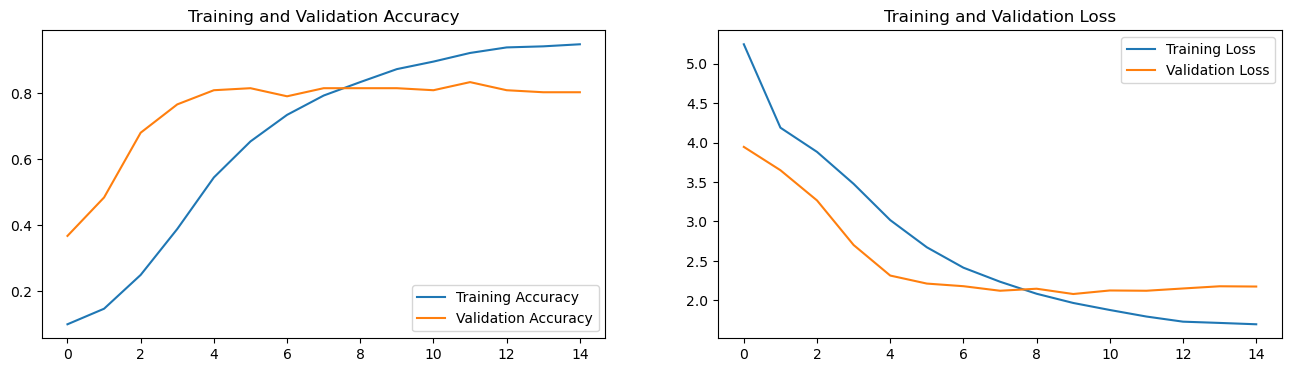

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define paths to directories
train_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/train'
validation_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/validation'

# Create Dataset from directories
def create_dataset(directory, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='categorical',  # Labels are one-hot encoded
        shuffle=True
    )
    return dataset

# Load data from directories
batch_size = 32
train_dataset = create_dataset(train_dir, batch_size)
validation_dataset = create_dataset(validation_dir, batch_size)

# Build ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)  # Increase dropout rate (prevent the model from becoming too dependent on specific neurons)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.7)(x)  # Another dropout layer
predictions = Dense(len(train_dataset.class_names), activation='softmax', kernel_regularizer=l2(0.01))(x) #increase the regularization strength

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers
for layer in base_model.layers[-5:]: #freezing more layers
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs to wait after no improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored quantity
)

# Define learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss
    factor=0.2,           # Reduce learning rate by a factor of 0.2
    patience=2,           # Wait for 2 epochs before reducing learning rate
    min_lr=1e-6           # Set a lower bound on the learning rate
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=50, # increased
    validation_data=validation_dataset,
    callbacks=[reduce_lr, early_stopping] 
)

# Save the model
model.save('resnet50_model_callbacks.h5')

# Print a summary of the model
model.summary()

plot_training_history(history)

In [ ]:
# still overfitting :( maybe the model is not good for this task 

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import mlflow
import mlflow.tensorflow
from mlflow import MlflowClient
import setuptools

# Initialisation de l'URL
mlflow_server_uri = "https://champi.heuzef.com"



In [3]:
# check if the server is available

import requests

def is_mlflow_tracking_server_available(mlflow_server_uri):
  try:
    response = requests.get(mlflow_server_uri)
    if response.status_code == 200:
      return True
    else:
      return False
  except requests.exceptions.RequestException:
    return False

if is_mlflow_tracking_server_available(mlflow_server_uri):
  print("Le serveur de tracking MLflow est disponible :", mlflow_server_uri)
else:
  print("Le serveur de tracking MLflow n'est pas disponible.")

requests.get(mlflow_server_uri)

Le serveur de tracking MLflow est disponible : https://champi.heuzef.com


<Response [200]>

In [4]:

mlflow.set_tracking_uri(mlflow_server_uri)
mlflow.set_experiment("champi") # Le nom du projet


# Define paths to directories
train_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/train'
validation_dir = 'C:/Users/vsavelev/GITHUB/DS_projet/LAYER2/MO/validation'

# Create Dataset from directories
def create_dataset(directory, batch_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(224, 224),
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=True
    )
    return dataset

# Load data from directories
batch_size = 32
train_dataset = create_dataset(train_dir, batch_size)
validation_dataset = create_dataset(validation_dir, batch_size)

# Build ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.7)(x)
predictions = Dense(len(train_dataset.class_names), activation='softmax', kernel_regularizer=l2(0.01))(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6
)

run_name = "resnet50__unfreeze5_callbacks"

# Define MLflow run
with mlflow.start_run(run_name=run_name) as run:
    # Log model parameters to MLflow
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("dropout_rate", 0.7)
    mlflow.log_param("learning_rate", 1e-5)

    # Train the model
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=[reduce_lr, early_stopping]
    )

    # Log training metrics to MLflow
    for epoch in range(len(history.history['loss'])):
        mlflow.log_metric("train_loss", history.history['loss'][epoch], step=epoch)
        mlflow.log_metric("train_accuracy", history.history['accuracy'][epoch], step=epoch)
        mlflow.log_metric("val_loss", history.history['val_loss'][epoch], step=epoch)
        mlflow.log_metric("val_accuracy", history.history['val_accuracy'][epoch], step=epoch)

    # Log final model
    mlflow.tensorflow.log_model(model, artifact_path=run_name+"_artifacts")



Found 12616 files belonging to 13 classes.
Found 163 files belonging to 13 classes.
Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2491s 6s/step - accuracy: 0.0847 - loss: 5.8520 - val_accuracy: 0.4417 - val_loss: 3.9198 - learning_rate: 1.0000e-05
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2780s 7s/step - accuracy: 0.1360 - loss: 4.2380 - val_accuracy: 0.5399 - val_loss: 3.6218 - learning_rate: 1.0000e-05
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2774s 7s/step - accuracy: 0.2402 - loss: 3.9099 - val_accuracy: 0.6810 - val_loss: 3.2485 - learning_rate: 1.0000e-05
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2429s 6s/step - accuracy: 0.3660 - loss: 3.5690 - val_accuracy: 0.7362 - val_loss: 2.7518 - learning_rate: 1.0000e-05
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2592s 7s/step - accuracy: 0.4996 - loss: 3.1509 - val_accuracy: 0.7730 - val_loss: 2.3880 - learning_rate: 1.0000e-05
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2618s 7s/step - accuracy: 0.6404 - loss: 2.7446 - val_accuracy: 0.7914 - val_loss: 2.2

KeyboardInterrupt: 

In [5]:

# Save the model locally as well
model.save('resnet50_model_callbacks.h5')

# Print a summary of the model
model.summary()

# You can use this function to plot training history if needed
def plot_training_history(history):
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_training_history(history)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 76,991,401 (293.70 MB)

 Trainable params: 25,646,093 (97.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 51,292,188 (195.66 MB)

NameError: name 'history' is not defined

In [1]:
# defreeze all layers
# interpreptation : which part gradcam sur image classification

"""
https://inside-machinelearning.com/keras-gradcam-tutoriel

https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Explain%20MobilenetV2%20using%20the%20Partition%20explainer%20%28PyTorch%29.html

https://poloclub.github.io/cnn-explainer/

"""

NameError: name 'model' is not defined

In [ ]:
"""
Found 12616 files belonging to 13 classes.
Found 163 files belonging to 13 classes.
Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2491s 6s/step - accuracy: 0.0847 - loss: 5.8520 - val_accuracy: 0.4417 - val_loss: 3.9198 - learning_rate: 1.0000e-05
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2780s 7s/step - accuracy: 0.1360 - loss: 4.2380 - val_accuracy: 0.5399 - val_loss: 3.6218 - learning_rate: 1.0000e-05
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2774s 7s/step - accuracy: 0.2402 - loss: 3.9099 - val_accuracy: 0.6810 - val_loss: 3.2485 - learning_rate: 1.0000e-05
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2429s 6s/step - accuracy: 0.3660 - loss: 3.5690 - val_accuracy: 0.7362 - val_loss: 2.7518 - learning_rate: 1.0000e-05
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2592s 7s/step - accuracy: 0.4996 - loss: 3.1509 - val_accuracy: 0.7730 - val_loss: 2.3880 - learning_rate: 1.0000e-05
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2618s 7s/step - accuracy: 0.6404 - loss: 2.7446 - val_accuracy: 0.7914 - val_loss: 2.2776 - learning_rate: 1.0000e-05
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2595s 7s/step - accuracy: 0.7238 - loss: 2.4671 - val_accuracy: 0.8160 - val_loss: 2.2215 - learning_rate: 1.0000e-05
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2708s 7s/step - accuracy: 0.7835 - loss: 2.2709 - val_accuracy: 0.8221 - val_loss: 2.1896 - learning_rate: 1.0000e-05
Epoch 9/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2403s 6s/step - accuracy: 0.8369 - loss: 2.0898 - val_accuracy: 0.8344 - val_loss: 2.1191 - learning_rate: 1.0000e-05
Epoch 10/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2188s 6s/step - accuracy: 0.8759 - loss: 1.9587 - val_accuracy: 0.8589 - val_loss: 2.1327 - learning_rate: 1.0000e-05
Epoch 11/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3844s 10s/step - accuracy: 0.9061 - loss: 1.8641 - val_accuracy: 0.8528 - val_loss: 2.0924 - learning_rate: 1.0000e-05
Epoch 12/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2543s 6s/step - accuracy: 0.9285 - loss: 1.7836 - val_accuracy: 0.8405 - val_loss: 2.1150 - learning_rate: 1.0000e-05
Epoch 13/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1967s 5s/step - accuracy: 0.9438 - loss: 1.7205 - val_accuracy: 0.8466 - val_loss: 2.0380 - learning_rate: 1.0000e-05
Epoch 14/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3604s 9s/step - accuracy: 0.9596 - loss: 1.6534 - val_accuracy: 0.8405 - val_loss: 2.0600 - learning_rate: 1.0000e-05
Epoch 15/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 37407s 95s/step - accuracy: 0.9639 - loss: 1.6170 - val_accuracy: 0.8528 - val_loss: 2.0319 - learning_rate: 1.0000e-05
Epoch 16/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1931s 5s/step - accuracy: 0.9740 - loss: 1.5687 - val_accuracy: 0.8528 - val_loss: 2.0340 - learning_rate: 1.0000e-05
Epoch 17/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2370s 6s/step - accuracy: 0.9745 - loss: 1.5440 - val_accuracy: 0.8405 - val_loss: 2.0015 - learning_rate: 1.0000e-05
Epoch 18/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3291s 8s/step - accuracy: 0.9821 - loss: 1.5040 - val_accuracy: 0.8650 - val_loss: 1.9666 - learning_rate: 1.0000e-05
Epoch 19/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 4719s 12s/step - accuracy: 0.9877 - loss: 1.4689 - val_accuracy: 0.8650 - val_loss: 1.9311 - learning_rate: 1.0000e-05
Epoch 20/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2176s 6s/step - accuracy: 0.9911 - loss: 1.4414 - val_accuracy: 0.8773 - val_loss: 1.9213 - learning_rate: 1.0000e-05
Epoch 21/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 24151s 61s/step - accuracy: 0.9876 - loss: 1.4215 - val_accuracy: 0.8528 - val_loss: 1.9028 - learning_rate: 1.0000e-05
Epoch 22/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3232s 8s/step - accuracy: 0.9938 - loss: 1.3837 - val_accuracy: 0.8773 - val_loss: 1.8655 - learning_rate: 1.0000e-05
Epoch 23/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1964s 5s/step - accuracy: 0.9908 - loss: 1.3609 - val_accuracy: 0.8528 - val_loss: 1.9050 - learning_rate: 1.0000e-05
Epoch 24/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2085s 5s/step - accuracy: 0.9949 - loss: 1.3233 - val_accuracy: 0.8589 - val_loss: 1.8978 - learning_rate: 1.0000e-05
Epoch 25/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2017s 5s/step - accuracy: 0.9954 - loss: 1.2955 - val_accuracy: 0.8650 - val_loss: 1.8539 - learning_rate: 2.0000e-06
Epoch 26/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 42383s 108s/step - accuracy: 0.9962 - loss: 1.2885 - val_accuracy: 0.8712 - val_loss: 1.8314 - learning_rate: 2.0000e-06
Epoch 27/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2544s 6s/step - accuracy: 0.9958 - loss: 1.2817 - val_accuracy: 0.8650 - val_loss: 1.8324 - learning_rate: 2.0000e-06
Epoch 28/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2501s 6s/step - accuracy: 0.9976 - loss: 1.2710 - val_accuracy: 0.8589 - val_loss: 1.8316 - learning_rate: 2.0000e-06
Epoch 29/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2625s 7s/step - accuracy: 0.9963 - loss: 1.2652 - val_accuracy: 0.8650 - val_loss: 1.8263 - learning_rate: 1.0000e-06
Epoch 30/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2655s 7s/step - accuracy: 0.9975 - loss: 1.2591 - val_accuracy: 0.8712 - val_loss: 1.8105 - learning_rate: 1.0000e-06
Epoch 31/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2572s 7s/step - accuracy: 0.9979 - loss: 1.2559 - val_accuracy: 0.8650 - val_loss: 1.8199 - learning_rate: 1.0000e-06
Epoch 32/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2284s 6s/step - accuracy: 0.9978 - loss: 1.2485 - val_accuracy: 0.8650 - val_loss: 1.8312 - learning_rate: 1.0000e-06
Epoch 33/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2392s 6s/step - accuracy: 0.9972 - loss: 1.2443 - val_accuracy: 0.8528 - val_loss: 1.8201 - learning_rate: 1.0000e-06
Epoch 34/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2597s 7s/step - accuracy: 0.9980 - loss: 1.2402 - val_accuracy: 0.8650 - val_loss: 1.8054 - learning_rate: 1.0000e-06
Epoch 35/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2408s 6s/step - accuracy: 0.9987 - loss: 1.2324 - val_accuracy: 0.8528 - val_loss: 1.7969 - learning_rate: 1.0000e-06
Epoch 36/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2412s 6s/step - accuracy: 0.9985 - loss: 1.2261 - val_accuracy: 0.8589 - val_loss: 1.7965 - learning_rate: 1.0000e-06
Epoch 37/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2407s 6s/step - accuracy: 0.9986 - loss: 1.2198 - val_accuracy: 0.8589 - val_loss: 1.7878 - learning_rate: 1.0000e-06
Epoch 38/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 62327s 158s/step - accuracy: 0.9990 - loss: 1.2131 - val_accuracy: 0.8650 - val_loss: 1.7906 - learning_rate: 1.0000e-06
Epoch 39/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2381s 6s/step - accuracy: 0.9977 - loss: 1.2106 - val_accuracy: 0.8589 - val_loss: 1.7810 - learning_rate: 1.0000e-06

"""